# Udacity Project 1

### 0. Load Libraries

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import plotly.express as px
from datetime import datetime as dt
# from pandas_profiling import ProfileReport
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
print('Import done.')

Import done.


### 1. Gather 
Data used for this project is available on http://insideairbnb.com/get-the-data/  
AirBnB data for listings im Munich has been selected (from Sep/2022).

In [2]:
# Set the path where your csv files are located
path = f"C:/develop/VSCode/Udacity/project_1/"

In [3]:
df_listings = pd.read_csv(f"{path}sep_2022/muc_sep_2022_listings.csv")
df_cal = pd.read_csv(f"{path}sep_2022/muc_sep_2022_calendar.csv")
# df_rev = pd.read_csv(f"C:/develop/VSCode/Udacity/project_1/muc_reviews.csv")

# 1.X Add more data

In [4]:
# Add more data
df_listings_dec21 = pd.read_csv(f"{path}Dec_2021/muc_dec_2021_listings.csv")
df_cal_dec21 = pd.read_csv(f"{path}Dec_2021/muc_dec_2021_calendar.csv")

df_listings_mar22 = pd.read_csv(f"{path}Mar_2022/muc_mar_2022_listings.csv")
df_cal_mar22 = pd.read_csv(f"{path}Mar_2022/muc_mar_2022_calendar.csv")

df_listings_jun22 = pd.read_csv(f"{path}jun_2022/muc_jun_2022_listings.csv")
df_cal_jun22 = pd.read_csv(f"{path}jun_2022/muc_jun_2022_calendar.csv")

df_listings_sep22 = pd.read_csv(f"{path}sep_2022/muc_sep_2022_listings.csv")
df_cal_sep22 = pd.read_csv(f"{path}sep_2022/muc_sep_2022_calendar.csv")

In [5]:
# Get symmetric difference of multiple sets:
## https://www.geeksforgeeks.org/python-symmetric-difference-of-multiple-sets/

from collections import Counter
from itertools import chain
  
# initializing list
column_sets = [ set(df_listings_sep22.columns),
                set(df_listings_mar22.columns),
                set(df_listings_jun22.columns),
                set(df_listings_dec21.columns)]
  
# getting frequencies using Counter()
# from_iterable() flattens the list 
freq = Counter(chain.from_iterable(column_sets))
  
# getting frequency count below 4 (not contained in all sets)
res = {idx for idx in freq if freq[idx] < 4}
  
# printing result
print("Symmetric difference of multiple list : " + str(res))

df_listings_sep22.drop("source", axis=1, inplace=True)

Symmetric difference of multiple list : {'source'}


In [6]:
# Concatenate dfs and keep only entry from newest available scraping date
df_listings = pd.concat([df_listings_dec21, df_listings_mar22, df_listings_jun22, df_listings_sep22]).sort_values(by=["id", "last_scraped"])
df_listings.drop_duplicates(subset="id", keep="last", inplace=True)
df_listings.reset_index(inplace=True, drop=True)
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20220921172344,2022-09-21,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,4.93,4.78,4.73,NaN,f,2,2,0,0,0.97
1,114695,https://www.airbnb.com/rooms/114695,20220921172344,2022-09-21,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,...,5.00,4.56,4.59,NaN,f,2,2,0,0,0.40
2,127383,https://www.airbnb.com/rooms/127383,20220921172344,2022-09-21,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,...,4.96,4.92,4.81,NaN,f,1,1,0,0,0.78
3,159634,https://www.airbnb.com/rooms/159634,20220921172344,2022-09-21,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/4203267/08141...,765694,https://www.airbnb.com/users/show/765694,...,4.76,4.52,4.36,NaN,t,1,1,0,0,0.26
4,170154,https://www.airbnb.com/rooms/170154,20220921172344,2022-09-21,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,https://www.airbnb.com/users/show/108297,...,4.98,4.76,4.90,NaN,f,1,0,1,0,3.86


#### Concatenate calendar data frames

In [7]:
df_cal_dec21["scraped_on"] = "2021-12-24"
df_cal_mar22["scraped_on"] = "2022-03-26"
df_cal_jun22["scraped_on"] = "2022-06-21"
df_cal_sep22["scraped_on"] = "2022-09-22"

# Keep only newest entry for a booking date
df_cal = pd.concat([df_cal_dec21, df_cal_mar22, df_cal_jun22, df_cal_sep22]).sort_values(by=["listing_id", "date", "scraped_on"])
df_cal.drop_duplicates(subset=["listing_id", "date"], keep="last", inplace=True)

df_cal.reset_index(inplace=True, drop=True)
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,scraped_on
0,97945,2021-12-24,f,$80.00,$80.00,2.0,90.0,2021-12-24
1,97945,2021-12-25,f,$80.00,$80.00,2.0,90.0,2021-12-24
2,97945,2021-12-26,f,$80.00,$80.00,2.0,90.0,2021-12-24
3,97945,2021-12-27,f,$80.00,$80.00,2.0,90.0,2021-12-24
4,97945,2021-12-28,f,$80.00,$80.00,2.0,90.0,2021-12-24


### 2. Data Understanding (Assess)

#### Business questions to answer:  
1. How much are AirBnB prices influenced by seasonal events (e.g. Oktoberfest) in Munich?
2. Is there a clear connection between the location of an appartment and the listing price (e.g. how close to the city centre)?
3. Can listing prices be modeled from the data available (e.g. reviews, rooms, type of accomodation etc.)?

In [8]:
# Check raw data
df_listings.head(5)
df_cal.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,scraped_on
0,97945,2021-12-24,f,$80.00,$80.00,2.0,90.0,2021-12-24
1,97945,2021-12-25,f,$80.00,$80.00,2.0,90.0,2021-12-24
2,97945,2021-12-26,f,$80.00,$80.00,2.0,90.0,2021-12-24
3,97945,2021-12-27,f,$80.00,$80.00,2.0,90.0,2021-12-24
4,97945,2021-12-28,f,$80.00,$80.00,2.0,90.0,2021-12-24


In [9]:
# Does the same listing id represent the same appartment?
# Extract example IDs contained in oldest and newest scraping data
set(df_listings_dec21["id"]) & set(df_listings["id"])

# Concatenate entries for these example IDs
examples_sep22 = df_listings.loc[df_listings["id"].isin([42500098, 49831940, 20709383, 114695])]#.drop("source", axis=1)
examples_dec21 = df_listings_dec21.loc[df_listings_dec21["id"].isin([42500098, 49831940, 20709383, 114695])]

examples_concat = pd.concat([examples_sep22, examples_dec21]).sort_values(by="id")
examples_concat

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,114695,https://www.airbnb.com/rooms/114695,20220921172344,2022-09-21,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,...,5.00,4.56,4.59,NaN,f,2,2,0,0,0.40
1,114695,https://www.airbnb.com/rooms/114695,20211224070709,2021-12-24,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,...,5.00,4.55,4.60,NaN,f,2,2,0,0,0.42
1784,20709383,https://www.airbnb.com/rooms/20709383,20220921172344,2022-09-21,Helle 2-Zimmer Wohnung mit Balkon in München,Meine Wohnung liegt direkt zwischen Romanplatz...,NaN,https://a0.muscache.com/pictures/7aea8d33-7926...,10426194,https://www.airbnb.com/users/show/10426194,...,5.00,4.89,4.44,NaN,f,1,1,0,0,0.31
1365,20709383,https://www.airbnb.com/rooms/20709383,20211224070709,2021-12-24,Wunderschöne 2-Zimmer Wohnung in München,Meine Wohnung liegt direkt zwischen dem Romanp...,NaN,https://a0.muscache.com/pictures/7aea8d33-7926...,10426194,https://www.airbnb.com/users/show/10426194,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.05
4489,42500098,https://www.airbnb.com/rooms/42500098,20220921172344,2022-09-22,Stylish modern apartment close to the city centre,This is a perfect place for stay for several r...,"There are a lot of different shops, cafes and ...",https://a0.muscache.com/pictures/miso/Hosting-...,17811483,https://www.airbnb.com/users/show/17811483,...,4.92,4.50,4.73,NaN,f,1,1,0,0,1.73
3559,42500098,https://www.airbnb.com/rooms/42500098,20211224070709,2021-12-24,Stylish modern apartment close to the city centre,This is a perfect place for stay for several r...,"There are a lot of different shops, cafes and ...",https://a0.muscache.com/pictures/miso/Hosting-...,17811483,https://www.airbnb.com/users/show/17811483,...,5.00,4.67,4.67,NaN,f,1,1,0,0,2.02
5360,49831940,https://www.airbnb.com/rooms/49831940,20220921172344,2022-09-22,Altbauwohnung /Schwabing-Mitte,Unsere großzügige 60 m² Altbauwohnung im Erdge...,"Die Wohnung befindet sich in Schwabing Mitte, ...",https://a0.muscache.com/pictures/36e0e938-b2ef...,30203929,https://www.airbnb.com/users/show/30203929,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.06
4296,49831940,https://www.airbnb.com/rooms/49831940,20211224070709,2021-12-24,Altbauwohnung /Schwabing-Mitte,Unsere großzügige 60 m² Altbauwohnung im Erdge...,"Die Wohnung befindet sich in Schwabing Mitte, ...",https://a0.muscache.com/pictures/36e0e938-b2ef...,30203929,https://www.airbnb.com/users/show/30203929,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.15


#### Check whether listing IDs match in both dfs

In [10]:
# Number of unique IDs is the same
print(f"Unique IDs in df_listings: {len(df_listings['id'].unique())}")
print(f"Unique IDs in df_cal: {len(df_cal['listing_id'].unique())}")

df_id_listings = pd.DataFrame(df_listings["id"].unique())
df_id_listings["source"] = "listings"
df_id_listings.rename(columns={0:"listing_id"}, inplace=True)


df_id_cal = pd.DataFrame(df_cal["listing_id"].unique())
df_id_cal["source"] = "calendar"
df_id_cal.rename(columns={0:"listing_id"}, inplace=True)

df_id_joined = pd.merge(df_id_listings, df_id_cal, on="listing_id", how="outer")


# Check null values per column (IDs that were only contained in one of the two source tables)
df_id_joined.isnull().sum()

Unique IDs in df_listings: 8767
Unique IDs in df_cal: 8766


listing_id    0
source_x      0
source_y      1
dtype: int64

### 3. Prepare Data (Clean)

#### Prepare amenities column for analysis

In [11]:
# Replace special characters in string and convert to list
df_listings["amenities_list"] = df_listings["amenities"].apply(lambda x: x.replace('"', '')
                                                                          .replace('[', '')
                                                                          .replace(']','')
                                                                          .split(", "))

# Check that list conversion worked
type(df_listings["amenities_list"].values[0])

# Convert list to dummies
# https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
df_amenities = pd.get_dummies(df_listings["amenities_list"].apply(pd.Series).stack()).sum(level=0)
# display(HTML(df_amenities.head(3).to_html()))

C:\Users\q514907\AppData\Local\Temp\ipykernel_29116\1136118215.py:12: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_amenities = pd.get_dummies(df_listings["amenities_list"].apply(pd.Series).stack()).sum(level=0)


##### Identify how many unique amenity dummy columns to keep

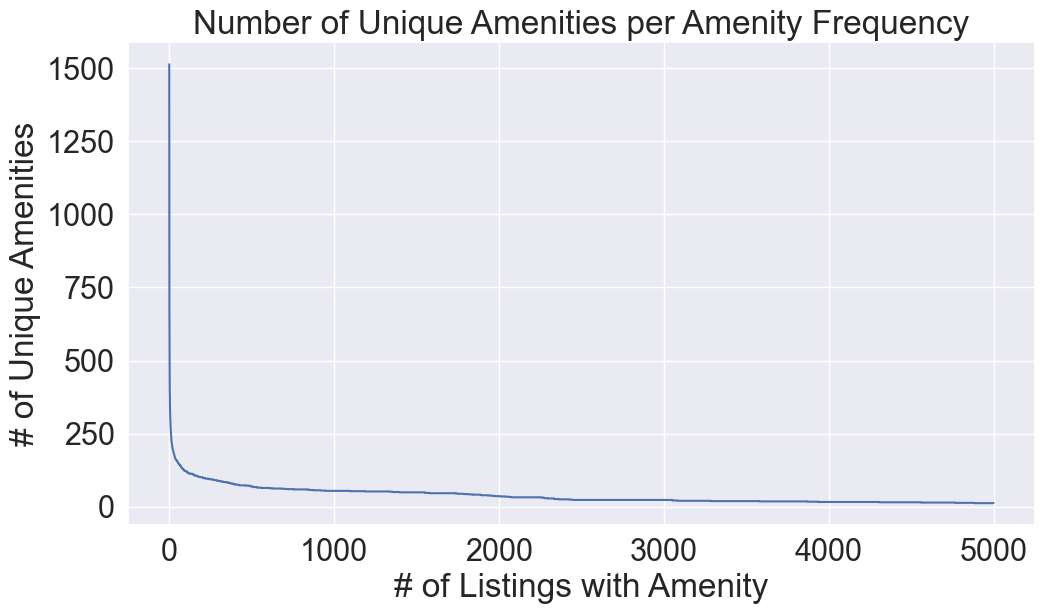

In [60]:
# Keep only values above threshold: 
# https://stackoverflow.com/questions/29281815/pandas-select-dataframe-columns-using-boolean

cutoff_data = []
# Visually inspect which is the best cutoff
for cutoff in range(5000):
    amenities_keep = df_amenities.sum() > cutoff
    cutoff_data.append(len(amenities_keep.index[amenities_keep]))

df_cutoff = pd.DataFrame(cutoff_data)
df_cutoff = df_cutoff.reset_index()
df_cutoff = df_cutoff.rename(columns={"index":"cutoff", 0:"unique_amenities"})

# Plot unique amenities columns per cutoff value
sns.set(font_scale=2)
amenities_plot = sns.lineplot(data=df_cutoff, x="cutoff", y="unique_amenities")
amenities_plot.set(xlabel="# of Listings with Amenity", ylabel="# of Unique Amenities", title="Number of Unique Amenities per Amenity Frequency")
plt.savefig("Unique_Amenities.png", bbox_inches="tight")
plt.show()

# Additional analysis: How much does the number of included unique amenities jump when the cutoff is changed?
# df_cutoff["prev_cutoff"] = df_cutoff["unique_amenities"].shift(-1)
# df_cutoff["cutoff_jump"] = 1 - df_cutoff["prev_cutoff"] / df_cutoff["unique_amenities"]
# df_cutoff


# sns.lineplot(data=df_cutoff, x="cutoff", y="cutoff_jump")
# plt.show()

In [57]:
# Keep only amenities with at least x entries
# Cutoff selected based on visual analysis and influence on model quality
amenities_keep = df_amenities.sum() > 10
df_amenities_subset = df_amenities[amenities_keep.index[amenities_keep]]
df_amenities_subset

,2-5 years old,32\ HDTV with standard cable,40\ HDTV with standard cable,42\ HDTV with standard cable,43\ HDTV,43\ HDTV with Amazon Prime Video,43\ HDTV with standard cable,5-10 years old,50\ HDTV with Amazon Prime Video,50\ HDTV with Netflix,...,and 10+ years old,and closet,and dresser,and wardrobe,closet,dresser,heated,open specific hours,premium cable,standard cable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
unique_amenities = df_amenities.columns.values.tolist()
len(unique_amenities)

unique_amenities = df_amenities_subset.columns.values.tolist()
len(unique_amenities)

254

#### Clean & Plot Price Data

In [14]:
def clean_price(df):
    # Change date format
    df["date_new"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
    df["date_week"] = df["date_new"].dt.strftime("%W-%Y")

    # Check that currency is always $ and give warning if not
    df["currency"] = df["price"].str[:1]
    if df["currency"].unique() != "$":
        print("Waning: Different currencies in data frame")

    # Check for decimals > always .00
    if df["price"].str[-3:].unique() != ".00":
        print("Warning: Decimal formatting not uniform in data frame")

    # Cut decimals and replace $
    df["price_num"] = df["price"].str[1:-3].apply(lambda x: x.replace(",", "")).astype(float)

    return df

#### Compare price seasonality for different scraping dates

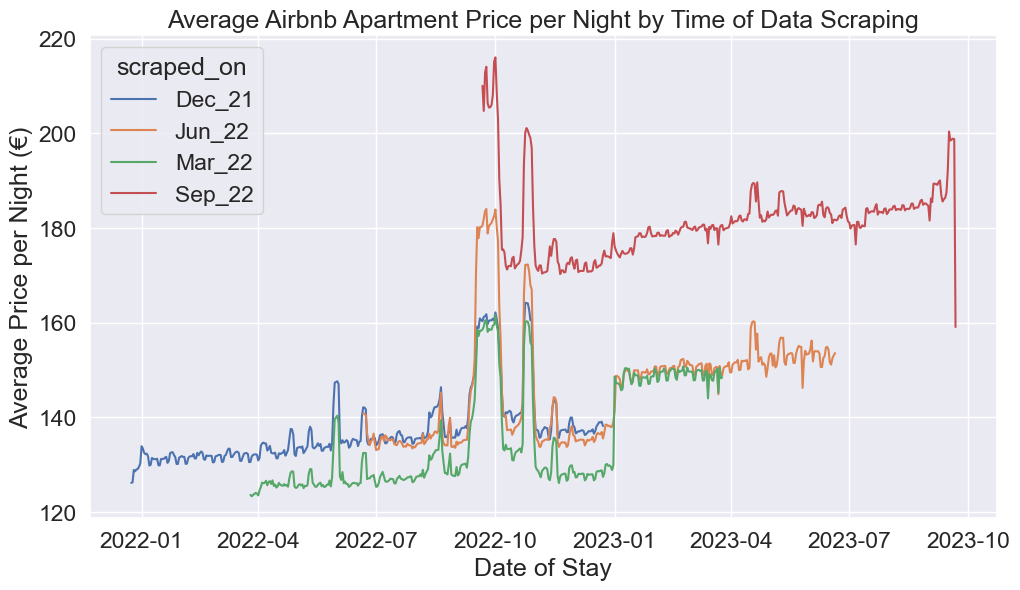

In [61]:
df_cal_dec21["scraped_on"] = "Dec_21"
df_cal_mar22["scraped_on"] = "Mar_22"
df_cal_jun22["scraped_on"] = "Jun_22"
df_cal_sep22["scraped_on"] = "Sep_22"

# df_cal_new = pd.concat([df_cal_jun22, df_cal_sep22])
df_cal_comp = pd.concat([df_cal_dec21, df_cal_mar22, df_cal_jun22, df_cal_sep22])

df_cal_comp = clean_price(df_cal_comp)

df_cal_comp = df_cal_comp.groupby(["scraped_on", "date_new"], as_index=False).agg({"price_num":"mean"}, axis=0)
df_cal_comp.rename(columns={"price_num":"price_avg"}, inplace=True)

# df_cal_avg = df_cal_comp.groupby(["scraped_on", "date_week"], as_index=False).agg({"price_num":"mean"}, axis=0)
# df_cal_avg.rename(columns={"price_num":"price_avg"}, inplace=True)

# Plot seasonal price variation
sns.set(rc={'figure.figsize':(11.7,6.27)})
sns.set(font_scale=1.5)
# sns.lineplot(data=df_cal, x="date_new", y="price_num")
plot_by_scraped = sns.lineplot(data=df_cal_comp, x="date_new", y="price_avg", hue="scraped_on")
plot_by_scraped.set(xlabel="Date of Stay", ylabel="Average Price per Night (€)", title="Average Airbnb Apartment Price per Night by Time of Data Scraping")
plt.savefig("Plot_Price_per_Night_by_Scraping_Date.png", bbox_inches="tight")
plt.show()

#### Plot single line with latest available price information

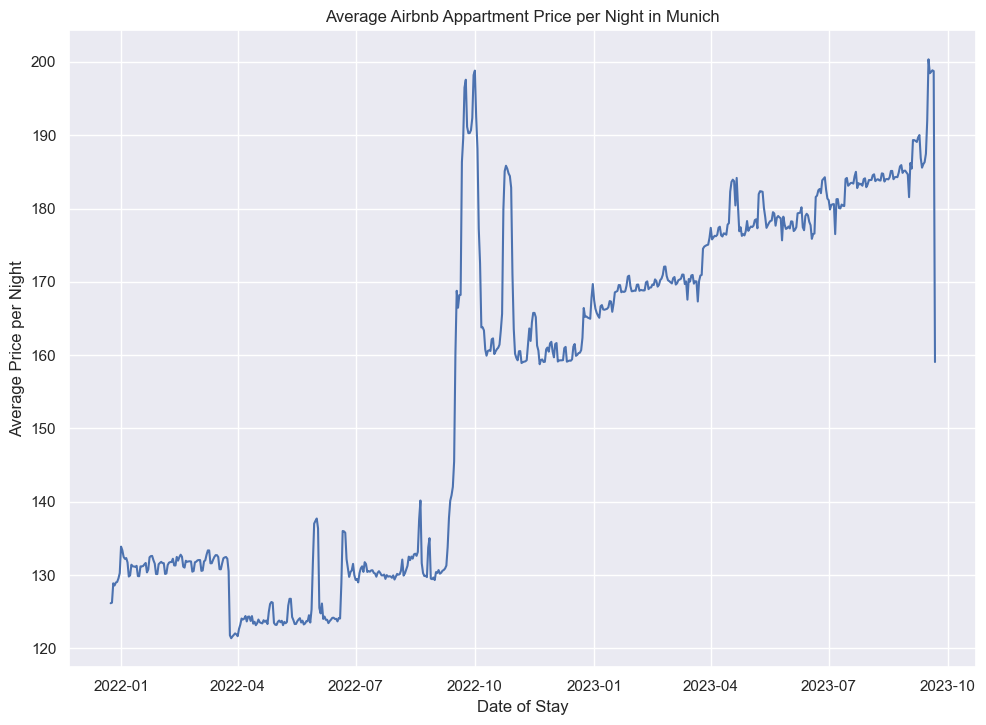

In [16]:
df_cal = clean_price(df_cal)

df_cal_avg = df_cal.groupby("date_new").agg({"price_num":"mean"}, axis=0)
df_cal_avg.rename(columns={"price_num":"price_avg"}, inplace=True)

# Plot seasonal price variation
sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.lineplot(data=df_cal, x="date_new", y="price_num")
plot_price = sns.lineplot(data=df_cal_avg, x="date_new", y="price_avg")
plot_price.set(xlabel="Date of Stay", ylabel="Average Price per Night", title="Average Airbnb Appartment Price per Night in Munich")
plt.show()

##### Aggregate prices per listing

In [17]:
# New groupby logic to potentially add different aggregations per column if necessary
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns

# Calculate average price per day for the next 365 days per listing
df_cal_grouped = df_cal.groupby("listing_id").agg({"price_num":"mean"}, axis=0)
df_cal_grouped.rename(columns={"price_num":"price_avg"}, inplace=True)

df_cal_grouped = df_cal_grouped.reset_index()

df_joined = pd.merge(df_listings, df_cal_grouped, left_on="id", right_on="listing_id", how="left")
print(f"Share of missing price values in df_cal_grouped: {df_cal_grouped['price_avg'].isna().sum() / df_cal_grouped.shape[0]}")
print(f"Share of missing price values in df_joined: {df_joined['price_avg'].isna().sum() / df_joined.shape[0]}")

# Remove entry with missing price
df_joined = df_joined.loc[df_joined["price_avg"].isnull()==False]

print(f"Shape of df: {df_joined.shape}")
df_joined.head()

# Prepare neighbourhoods data for map plots
neighborhoods_summary = df_joined.groupby("neighbourhood_cleansed").agg({"price_avg":"mean", "id":"count"}, axis=0)
neighborhoods_summary.reset_index(inplace=True)
neighborhoods_summary.rename(columns={"id":"count_listings", "neighbourhood_cleansed":"neighbourhood"}, inplace=True)


Share of missing price values in df_cal_grouped: 0.0
Share of missing price values in df_joined: 0.00011406410402646287
Shape of df: (8766, 77)


#### Impute Review Data

In [18]:
# Check null values for different review categories
review_cols = [col for col in list(df_joined.columns.values) if "review_scores" in col]

# Fill NAs with mean review score as approximation
df_scores = df_joined[review_cols].apply(lambda x: x.fillna(x.mean()), axis = 0)
df_scores.info()

# Drop old review columns with NAs and add new columns with imputed data
df_joined.drop(review_cols, axis=1, inplace=True)
df_joined = pd.merge(df_joined, df_scores, left_index=True, right_index=True, how="left")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 0 to 8766
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         8766 non-null   float64
 1   review_scores_accuracy       8766 non-null   float64
 2   review_scores_cleanliness    8766 non-null   float64
 3   review_scores_checkin        8766 non-null   float64
 4   review_scores_communication  8766 non-null   float64
 5   review_scores_location       8766 non-null   float64
 6   review_scores_value          8766 non-null   float64
dtypes: float64(7)
memory usage: 547.9 KB


#### Prepare neighborhoods data for model

In [19]:
# Check if column neighborhood_cleansed can be used (e.g. null values)
df_listings["neighbourhood_cleansed"].value_counts()

# Get number of listings per neighborhood
df_neighborhoods = pd.DataFrame(df_listings["neighbourhood_cleansed"].value_counts())
df_neighborhoods["neighbourhood_cleansed"].sum()

# No null values
df_listings["neighbourhood_cleansed"].isnull().sum()
df_neighborhoods

# Add neighborhood dummies to main df
df_joined = pd.get_dummies(df_joined, columns=["neighbourhood_cleansed"])

df_joined.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,neighbourhood_cleansed_Pasing-Obermenzing,neighbourhood_cleansed_Ramersdorf-Perlach,neighbourhood_cleansed_Schwabing-Freimann,neighbourhood_cleansed_Schwabing-West,neighbourhood_cleansed_Schwanthalerhöhe,neighbourhood_cleansed_Sendling,neighbourhood_cleansed_Sendling-Westpark,neighbourhood_cleansed_Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln,neighbourhood_cleansed_Tudering-Riem,neighbourhood_cleansed_Untergiesing-Harlaching
0,97945,https://www.airbnb.com/rooms/97945,20220921172344,2022-09-21,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,0,0,0,0,0,0,0,0,0,0
1,114695,https://www.airbnb.com/rooms/114695,20220921172344,2022-09-21,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,...,0,0,0,0,0,0,0,0,0,0
2,127383,https://www.airbnb.com/rooms/127383,20220921172344,2022-09-21,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,...,0,0,0,0,0,0,0,0,0,0


#### Prepare room / property type data

In [20]:
# Check the three columns
# Potentially need to cut property_type due to many unique values
df_listings["property_type"].value_counts()

# Only four unique room_type > dummy
df_listings["room_type"].value_counts()

# Potentially cut bathrooms_text due to many unique values
df_listings["bathrooms_text"].value_counts()

# Add dummies to data frame
# df_joined = pd.get_dummies(df_joined, columns=["property_type", "room_type", "bathrooms_text"])
df_joined = pd.get_dummies(df_joined, columns=["room_type"])
df_joined.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,neighbourhood_cleansed_Schwanthalerhöhe,neighbourhood_cleansed_Sendling,neighbourhood_cleansed_Sendling-Westpark,neighbourhood_cleansed_Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln,neighbourhood_cleansed_Tudering-Riem,neighbourhood_cleansed_Untergiesing-Harlaching,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,97945,https://www.airbnb.com/rooms/97945,20220921172344,2022-09-21,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,0,0,0,0,0,0,1,0,0,0
1,114695,https://www.airbnb.com/rooms/114695,20220921172344,2022-09-21,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,...,0,0,0,0,0,0,1,0,0,0
2,127383,https://www.airbnb.com/rooms/127383,20220921172344,2022-09-21,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,...,0,0,0,0,0,0,1,0,0,0
3,159634,https://www.airbnb.com/rooms/159634,20220921172344,2022-09-21,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/4203267/08141...,765694,https://www.airbnb.com/users/show/765694,...,0,0,0,0,0,0,1,0,0,0
4,170154,https://www.airbnb.com/rooms/170154,20220921172344,2022-09-21,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,https://www.airbnb.com/users/show/108297,...,0,0,1,0,0,0,0,0,1,0


#### Add amenities dummy columns prepared earlier

In [21]:
df_joined = pd.merge(df_joined, df_amenities_subset, left_index=True, right_index=True, how="outer")
df_joined.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,Stove,TV,TV with standard cable,Toaster,Washer,Waterfront,Wifi,Window guards,Wine glasses,standard cable
0,97945.0,https://www.airbnb.com/rooms/97945,2.022092e+13,2022-09-21,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685.0,https://www.airbnb.com/users/show/517685,...,1,0,1,0,0,0,1,1,0,0
1,114695.0,https://www.airbnb.com/rooms/114695,2.022092e+13,2022-09-21,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737.0,https://www.airbnb.com/users/show/581737,...,1,0,1,0,1,0,1,0,0,0
2,127383.0,https://www.airbnb.com/rooms/127383,2.022092e+13,2022-09-21,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556.0,https://www.airbnb.com/users/show/630556,...,1,0,1,0,1,0,1,0,0,0
3,159634.0,https://www.airbnb.com/rooms/159634,2.022092e+13,2022-09-21,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/4203267/08141...,765694.0,https://www.airbnb.com/users/show/765694,...,1,0,1,1,1,0,1,1,1,0
4,170154.0,https://www.airbnb.com/rooms/170154,2.022092e+13,2022-09-21,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297.0,https://www.airbnb.com/users/show/108297,...,1,1,0,1,0,0,1,0,1,0


#### Outlier detection and removal

<AxesSubplot:xlabel='price_avg'>

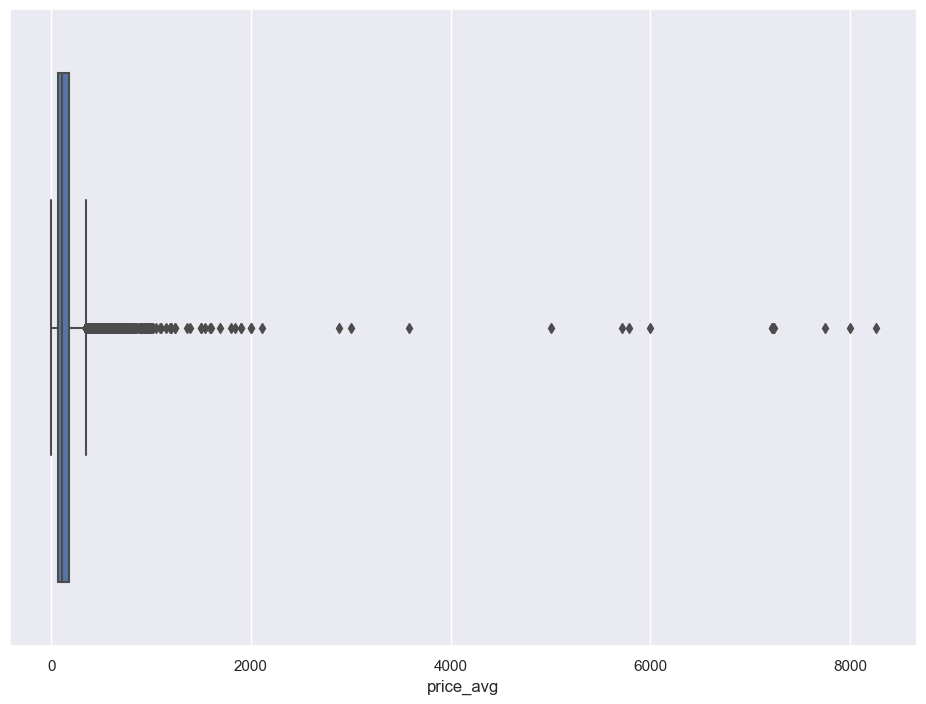

In [22]:
# Investigate outlier prices
# > Many outliers in the average price
sns.boxplot(df_joined, x="price_avg")

# df_joined = df_joined.loc[df_joined["price_avg"]<2000]

Old Shape:  (8766, 226)
New Shape:  (8545, 226)


C:\Users\q514907\AppData\Local\Temp\ipykernel_29116\765739936.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df_joined['price_avg'], 25,
C:\Users\q514907\AppData\Local\Temp\ipykernel_29116\765739936.py:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df_joined['price_avg'],75,


<function matplotlib.pyplot.show(close=None, block=None)>

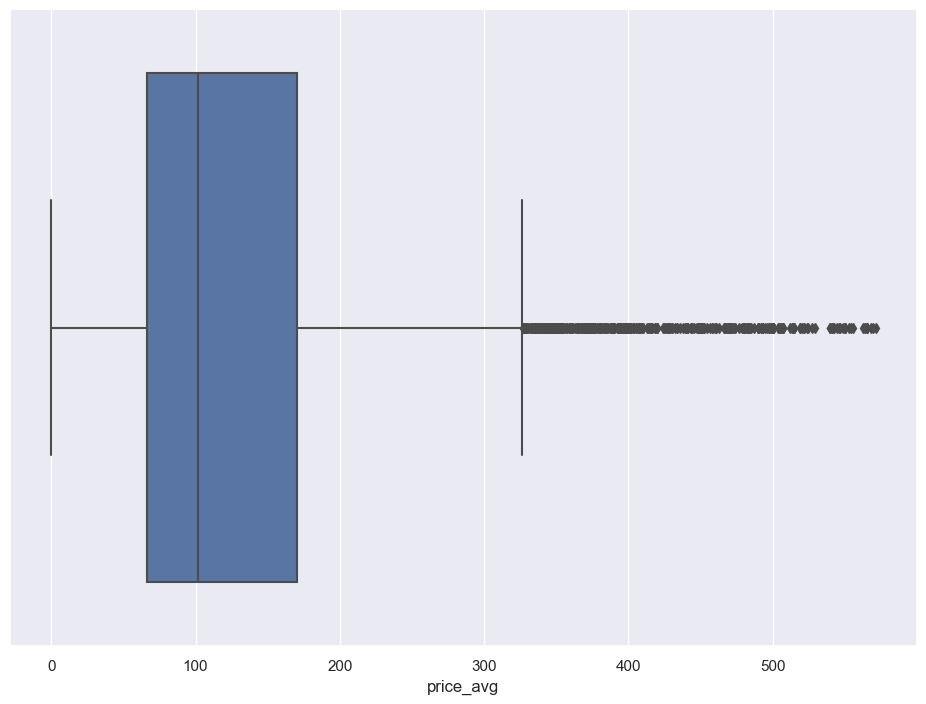

In [23]:
df_joined = df_joined.loc[df_joined["price_avg"].isna()==False]
df_joined.reset_index(inplace=True)

# Outlier detection and removal
# https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

# IQR
Q1 = np.percentile(df_joined['price_avg'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_joined['price_avg'],75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_joined.shape)
 
# Upper bound adjusted to higher value to only filter out extreme outliers
upper = np.where(df_joined['price_avg'] >= (Q3+3.5*IQR))
# Lower bound
lower = np.where(df_joined['price_avg'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_joined.drop(upper[0], inplace = True)
df_joined.drop(lower[0], inplace = True)
 
print("New Shape: ", df_joined.shape)

boxplot_outliers_removed = sns.boxplot(df_joined, x="price_avg")
plt.show

In [65]:
import kaleido
df_joined["longitude"]

muc_map = px.density_mapbox(df_joined, lat='latitude', lon='longitude', z='price_avg',
                            mapbox_style="stamen-terrain", width=1400, height=1000,
                            zoom=12, radius=12,
                            title="Average Price per Night for Airbnb Apartments in Munich", labels={"price_avg":"Avg Price (€)"})

muc_map.update_layout(font_size=20)


muc_map.show()

muc_map.write_image("Apartment_Price_Heatmap.png")

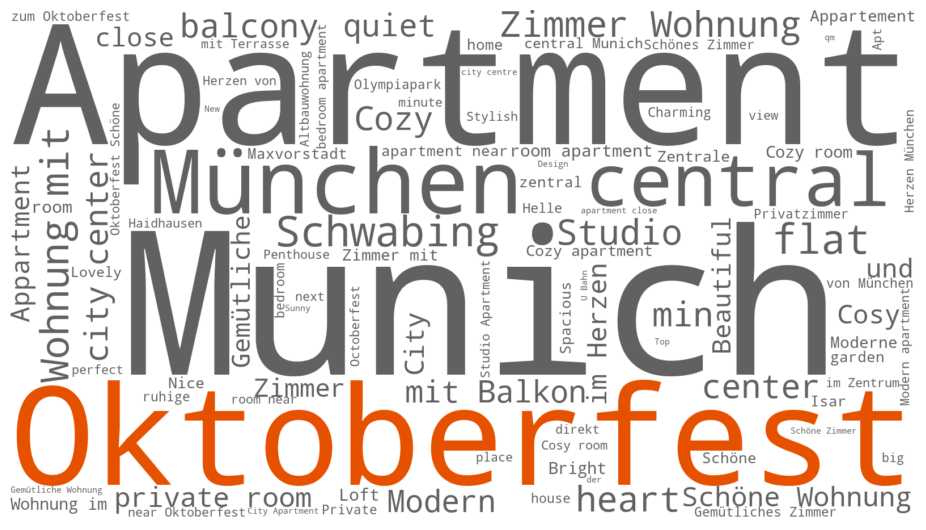

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df_joined.head()

app_names = df_joined["name"]
# app_names = " ".join(name for name in df_joined["name"])
app_names = " ".join(str(name) for name in df_joined["name"])


stopwords = ["Munich", "Apartment", "München", "in", "the"]
stopwords = []
# name_cloud = WordCloud(stopwords=stopwords).generate(app_names)


def color_func(word, *args, **kwargs):
    if word in ['Oktoberfest']:
        color = '#E65100'
    else:
        color = '#616161'
    return color

name_cloud = WordCloud(background_color="white", width=1600, height=900, max_words=100, color_func=color_func).generate(app_names)

name_cloud.to_file("wordcloud7.png")

plt.imshow(name_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Model Setup

In [26]:
# Columns to keep from df_listings
col_keep = []
col_excl = ["id", "scrape_id", "host_id", "neighbourhood_group_cleansed","longitude", "latitude", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights",
            "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "listing_id",
            "availability_365", # "availability_30", "availability_60", 
            "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms",
            "number_of_reviews_ltm", "number_of_reviews_l30d"
            ] 

# Exclude object-type columns & selected columns
df_model = df_joined.select_dtypes(exclude="object").drop(col_excl, axis=1)

# Remove special characters from column names to avoid erros for LightGBR
# Based on https://stackoverflow.com/questions/60582050/lightgbmerror-do-not-support-special-json-characters-in-feature-name-the-same
import re
df_model = df_model.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Check nulls per columns
# https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
percent_missing = df_model.isnull().sum() * 100 / len(df_model)
missing_value_df = pd.DataFrame({'column_name': df_model.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

df_model.dropna(axis=1, inplace=True)

display(HTML(df_model.head(3).to_html()))

df_model.shape

,index,accommodates,availability_30,availability_60,availability_90,number_of_reviews,calculated_host_listings_count,price_avg,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighbourhood_cleansed_AllachUntermenzing,neighbourhood_cleansed_AltstadtLehel,neighbourhood_cleansed_AuHaidhausen,neighbourhood_cleansed_AubingLochhausenLangwied,neighbourhood_cleansed_BergamLaim,neighbourhood_cleansed_Bogenhausen,neighbourhood_cleansed_FeldmochingHasenbergl,neighbourhood_cleansed_Hadern,neighbourhood_cleansed_Laim,neighbourhood_cleansed_LudwigsvorstadtIsarvorstadt,neighbourhood_cleansed_Maxvorstadt,neighbourhood_cleansed_MilbertshofenAmHart,neighbourhood_cleansed_Moosach,neighbourhood_cleansed_NeuhausenNymphenburg,neighbourhood_cleansed_Obergiesing,neighbourhood_cleansed_PasingObermenzing,neighbourhood_cleansed_RamersdorfPerlach,neighbourhood_cleansed_SchwabingFreimann,neighbourhood_cleansed_SchwabingWest,neighbourhood_cleansed_Schwanthalerhhe,neighbourhood_cleansed_Sendling,neighbourhood_cleansed_SendlingWestpark,neighbourhood_cleansed_ThalkirchenObersendlingForstenriedFrstenriedSolln,neighbourhood_cleansed_TuderingRiem,neighbourhood_cleansed_UntergiesingHarlaching,room_type_Entirehomeapt,room_type_Hotelroom,room_type_Privateroom,room_type_Sharedroom,Airconditioning,BBQgrill,Babybath,Babysitterrecommendations,Backyard,Bakingsheet,Barbecueutensils,Bathtub,Bedlinens,Bikes,Bluetoothsoundsystem,Boardgames,Bodysoap,Breakfast,Buildingstaff,CableTV,Carbonmonoxidealarm,Centralheating,Changingtable,Childrenu2019sbooksandtoys,Childrenu2019sdinnerware,Cleaningbeforecheckout,Cleaningproducts,Clothingstorage,Clothingstoragecloset,Clothingstoragedresser,Clothingstoragewardrobe,Coffeemaker,Conditioner,Cookingbasics,Crib,Dedicatedworkspace,Diningtable,Dishesandsilverware,Dishwasher,Dryer,Dryingrackforclothing,EVcharger,Electricstove,Elevator,Essentials,Ethernetconnection,Extrapillowsandblankets,Fireextinguisher,Firstaidkit,Freedryeru2013Inbuilding,Freedryeru2013Inunit,Freeparkingonpremises,Freestreetparking,Freewasher,Freewasheru2013Inbuilding,Freewasheru2013Inunit,Freezer,Gym,HDTV,HDTVwithAmazonPrimeVideo,Hairdryer,Hangers,Heating,Highchair,Hostgreetsyou,Hotwater,Hotwaterkettle,Indoorfireplace,Inductionstove,Iron,Keypad,Kitchen,Lakeaccess,Laundromatnearby,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Minifridge,Nespressomachine,Netflix,Outdoordiningarea,Outdoorfurniture,Outletcovers,Oven,Packu2019nplayTravelcrib,Paiddryeru2013Inbuilding,Paidparkingoffpremises,Paidparkingonpremises,Paidstreetparkingoffpremises,Paidwasheru2013Inbuilding,Patioorbalcony,Piano,Portablefans,Pourovercoffee,Privateentrance,Privatefencedgardenorbackyard,Privategardenorbackyard,Privatepatioorbalcony,Refrigerator,Ricemaker,Roomdarkeningshades,Safe,Securitycamerasonproperty,Shampoo,Sharedfencedgardenorbackyard,Sharedgardenorbackyard,Sharedpatioorbalcony,Showergel,Singlelevelhome,Smartlock,Smokealarm,Soundsystem,Stainlesssteeloven,Stove,TV,TVwithstandardcable,Toaster,Washer,Waterfront,Wifi,Windowguards,Wineglasses,standardcable
0,0,2.0,2.0,3.0,4.0,129.0,2.0,80.000000,4.84,4.89,4.82,4.90,4.93,4.78,4.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
1,1,5.0,11.0,20.0,50.0,54.0,2.0,99.213836,4.77,4.72,4.96,4.96,5.00,4.56,4.59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,

(8545, 165)

In [27]:
import math
# Prepare train and test data sets
X = df_model.drop(["price_avg"], axis=1)
y = df_model[["price_avg"]]

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

# # If our model works, it should just fit our model to the data. Otherwise, it will let us know.
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)
r2_test =  r2_score(y_test, y_test_preds) # Rsquared here for comparing test and preds from lm_2_model
print(f"MSE: {mean_squared_error(y_test, y_test_preds)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_test_preds))}")


# Print r2 to see result
r2_test

MSE: 5857.994550083961
RMSE: 76.5375368697214


c:\Users\q514907\Anaconda3\envs\udacity\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





0.3782412265216628

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)

# # If our model works, it should just fit our model to the data. Otherwise, it will let us know.
rf_model.fit(X_train, y_train)

y_test_preds = rf_model.predict(X_test)
r2_test =  r2_score(y_test, y_test_preds) # Rsquared here for comparing test and preds from lm_2_model

# Print r2 to see result
print(r2_test)

print(f"MSE: {mean_squared_error(y_test, y_test_preds)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_test_preds))}")

C:\Users\q514907\AppData\Local\Temp\ipykernel_29116\1764397333.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.41148683540730535
MSE: 5544.766005552451
RMSE: 74.46318557215002


In [29]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

svr_model = LinearSVR()

# # If our model works, it should just fit our model to the data. Otherwise, it will let us know.
svr_model.fit(X_train, y_train)

y_test_preds = svr_model.predict(X_test)
r2_test =  r2_score(y_test, y_test_preds) # Rsquared here for comparing test and preds from lm_2_model

# Print r2 to see result
r2_test
print(f"MSE: {mean_squared_error(y_test, y_test_preds)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_test_preds))}")

r2_test

c:\Users\q514907\Anaconda3\envs\udacity\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MSE: 18230.83113153031
RMSE: 135.02159505623652


c:\Users\q514907\Anaconda3\envs\udacity\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



-0.9349931289486277

In [30]:
from lightgbm import LGBMRegressor

gbr = LGBMRegressor(n_estimators=5000)
gbr.fit(X_train, y_train)

y_test_preds = gbr.predict(X_test)
r2_test =  r2_score(y_test, y_test_preds) # Rsquared here for comparing test and preds from lm_2_model

r2_test

print(f"MSE: {mean_squared_error(y_test, y_test_preds)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_test_preds))}")

MSE: 5248.730667353089
RMSE: 72.448123974007


### Create Choropleth Map

In [31]:
import json
with open("C:/develop/VSCode/Udacity/project_1/neighbourhoods.geojson") as f:
    neigh_json = json.load(f)
# neigh_json

# neigh_json["features"][0]

In [32]:
neighborhoods_summary.sort_values(by="price_avg", )

,neighbourhood,price_avg,count_listings
3,Aubing-Lochhausen-Langwied,103.165926,157
11,Milbertshofen-Am Hart,106.488990,316
12,Moosach,119.183255,179
15,Pasing-Obermenzing,119.658390,229
22,Thalkirchen-Obersendling-Forstenried-Fürstenri...,124.145929,339
7,Hadern,129.346111,86
0,Allach-Untermenzing,129.384595,77
24,Untergiesing-Harlaching,129.440948,257
6,Feldmoching-Hasenbergl,129.465947,121
13,Neuhausen-Nymphenburg,133.297616,547


In [33]:
import folium
# Change jupyter output size
# https://stackoverflow.com/questions/48789751/set-map-boundary-and-stop-endless-panning-in-a-loop-of-folium-map
f = folium.Figure(width=1400, height=700)


neigh_geo = f"C:/develop/VSCode/Udacity/project_1/neighbourhoods.geojson"
m = folium.Map(location=[48.1408198,11.5541786], zoom_start=11).add_to(f)

folium.Choropleth(
    geo_data=neigh_geo,
    name="choropleth",
    data=neighborhoods_summary,
    columns=["neighbourhood", "price_avg"],
    key_on="feature.properties.neighbourhood",
    fill_color="RdPu", 
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Airbnb Listing Price per Night (€)",
    nan_fill_color = "grey"
).add_to(m)

folium.LayerControl().add_to(m)
m.save("Neighbourhoods_Prices.html")
m
